In [1]:
#!pip install -U scikIt-learn
#!pip install imagehash
#!pip install -U matplotlib

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from time import time

from sklearn.cluster import DBSCAN, KMeans

import seaborn as sns

sns.set()

from PIL import Image

import numpy as np
from numpy import mean
from numpy import isnan
from numpy import asarray

import os
import shutil, glob, os.path

from random import shuffle

from tqdm import tqdm

import math

import skimage
from skimage import data, io, color
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.feature import canny

from random import randint
from sklearn.linear_model import LinearRegression
from scipy import stats



# processamento de imagem

Using Gray Scale Segmentation
files: ['branca01.jpg', 'branca02.jpg', 'branca03.jpg', 'casal_branco01.jpg', 'casal_moreno01.jpg', 'desktop.ini', 'familia_branca01.jpg', 'familia_morena01.jpg', 'homem_branco01.jpg', 'homem_branco02.jpg', 'homem_branco03.jpg', 'homem_branco04.jpg', 'homem_moreno01.jpg', 'homem_moreno02.jpg', 'homem_moreno03.jpg', 'homem_moreno04.jpg', 'image_teste_segementacao_3_classes.png', 'jovem_branco01.jpg', 'jovem_branco02.jpg', 'jovem_branco03.jpg', 'jovem_branco04.jpg', 'jovem_loura01.jpg', 'jovem_moreno01.jpg', 'jovem_moreno02.jpg', 'jovem_moreno03.jpg', 'jovem_moreno04.jpg', 'morena01.jpg', 'morena02.jpg', 'morena03.jpg', 'mulher_morena01.jpg', 'mulher_morena02.jpg', 'mulher_morena03.jpg', 'senhora_branca01.jpg', 'senhora_branca02.jpg', 'senhora_branca03.jpg', 'senhora_branca04.jpg', 'senhora_morena01.jpg', 'senhora_morena02.jpg', 'senhora_morena03.jpg', 'senhora_morena04.jpg', 'senhor_branco01.jpg', 'senhor_branco02.jpg', 'senhor_branco03.jpg', 'senhor_branco

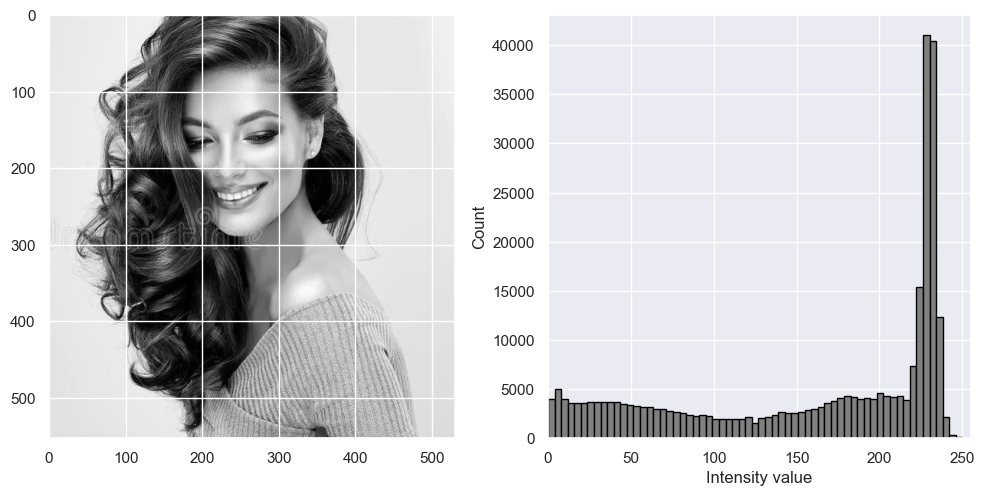

(900, 675, 3)
number of colors 3


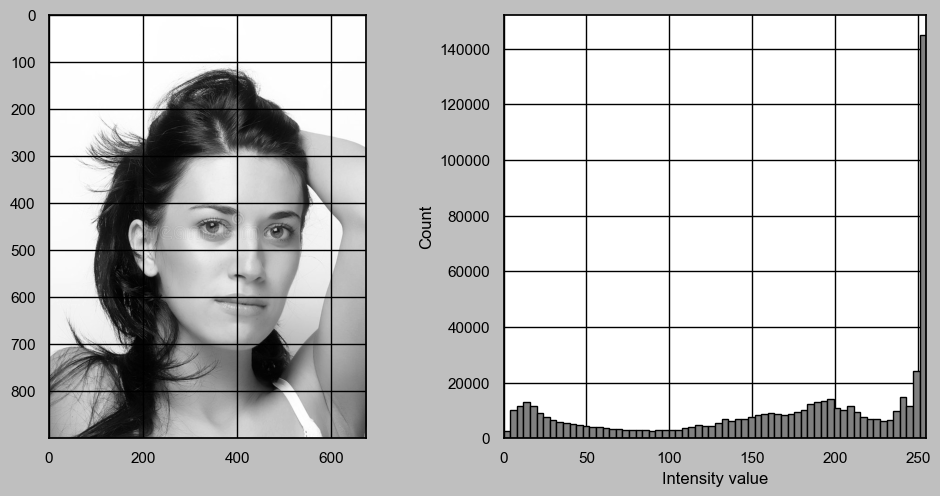

(533, 626, 3)
number of colors 3


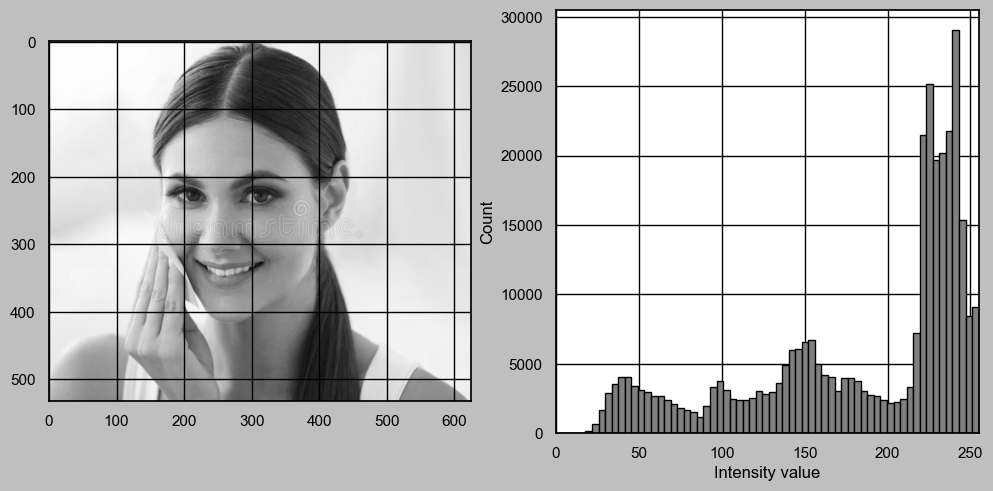

(533, 800, 3)
number of colors 3


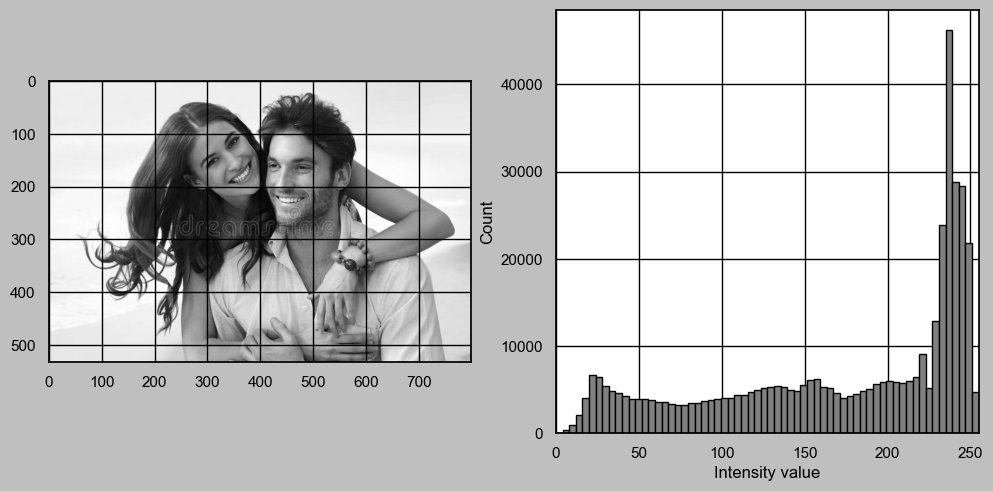

(533, 800, 3)
number of colors 3


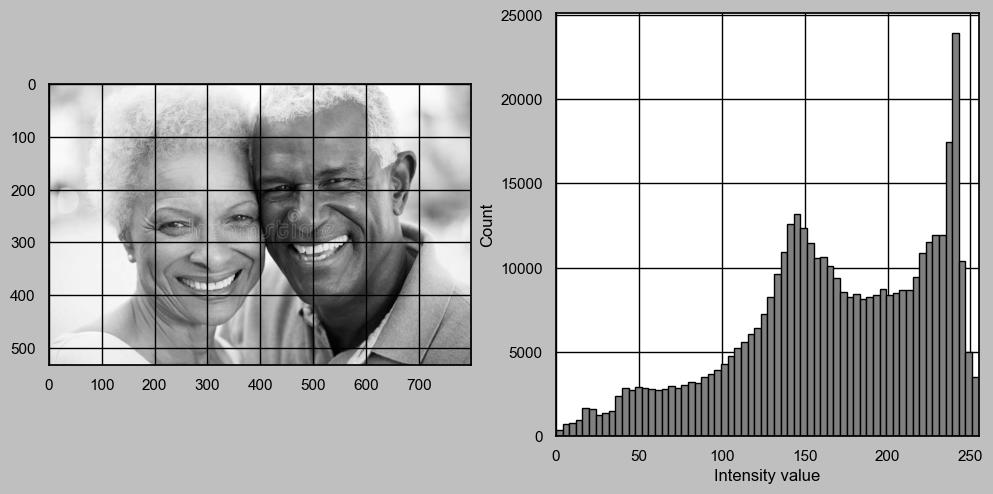

(533, 800, 3)
number of colors 3


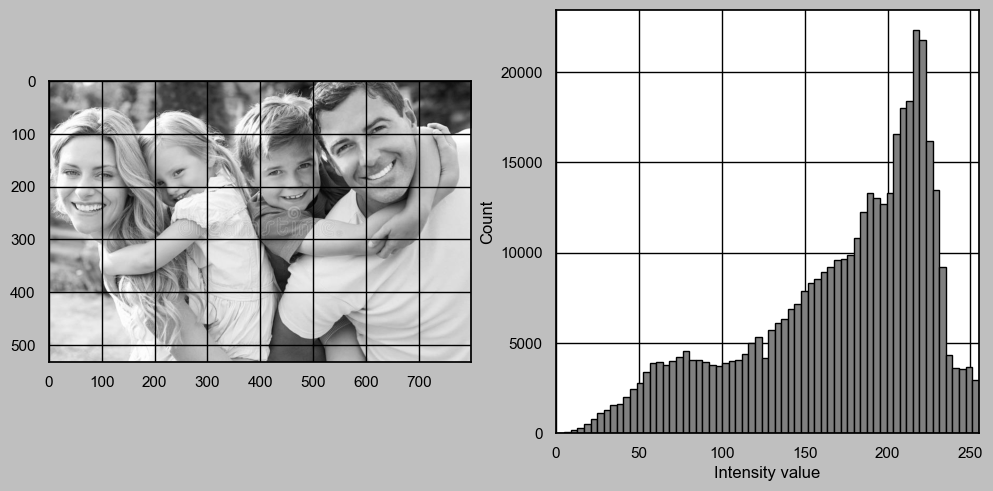

Number of images loaded = 6


In [3]:

as_gray = True

if as_gray:
    print('Using Gray Scale Segmentation')
    
INPUT_PATH = 'faces'

Files = os.listdir(INPUT_PATH)
print('files:', os.listdir(INPUT_PATH))

Img = []
img = []
ncolors = []
ResX = []
ResY = []
n = []
sizes = []
times = []


nImg = 7

for filename in Files[:nImg]:
    if filename.endswith('.jpg') or filename.endswith('.png'):
        try:
            img.append(io.imread(INPUT_PATH + '/' + filename))
            print(img[-1].shape)
            Img.append(img)
            fig2, ax2 = plt.subplots(1, 2, figsize=(12, 5.5))
            ncolors.append(img[-1].shape[-1] if len(img[-1].shape) > 2 else 1)
            ResX.append(img[-1].shape[0])
            ResY.append(img[-1].shape[1])
            n.append(ResX[-1] * ResY[-1])
            print('number of colors', ncolors[-1])
            
            if not as_gray:
                ax2[0].imshow(img[-1])
                if ncolors[-1] > 1:
                    ax2[1].hist(img[-1].ravel(), bins=64, color='orange', alpha=0.5)
                    ax2[1].hist(img[-1][:, :, 0].ravel(), bins=64, color='Red', alpha=0.5)
                    ax2[1].hist(img[-1][:, :, 1].ravel(), bins=64, color='Green', alpha=0.5)
                    ax2[1].hist(img[-1][:, :, 2].ravel(), bins=64, color='Blue', alpha=0.5)
                    ax2[1].legend(['Total', 'Red_channel', 'Green_channel', 'Blue_channel'])
            else:
                plt.style.use('grayscale')
                if ncolors[-1] > 1:
                    img[-1] = np.round(255 * rgb2gray(img[-1])).astype(np.uint8)
                ncolors[-1] = 1
                ax2[0].imshow(img[-1], cmap='gray')
                ax2[1].hist(img[-1].ravel(), bins=64, color='gray')
                
            ax2[1].set_xlim(0, 255)
            ax2[1].set_xlabel('Intensity value')
            ax2[1].set_ylabel('Count')
            plt.show()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)

print('Number of images loaded =', len(img))


In [4]:
Images = []

# Garante que nImg não exceda o número real de imagens carregadas
nImg = min(nImg, len(img))

for my_img in range(nImg):
    image = img[my_img]  # Acessa a imagem na lista img
    
    ch = []
    
    for c in range(ncolors[my_img]):
        if ncolors[my_img] > 1:
            ch.append(image[:, :, c].flatten()) #transforma img em vetor
        else:
            ch.append(image.flatten())
            
    print(ch)
    Images.append(np.array(ch))

[array([229, 229, 229, ..., 218, 218, 218], dtype=uint8)]
[array([255, 255, 255, ..., 132, 132, 132], dtype=uint8)]
[array([253, 253, 253, ..., 234, 234, 234], dtype=uint8)]
[array([238, 238, 238, ..., 193, 187, 181], dtype=uint8)]
[array([154, 155, 157, ..., 118, 136, 127], dtype=uint8)]
[array([ 94,  96,  99, ..., 211, 209, 208], dtype=uint8)]


In [5]:
import random
#gera cores 

my_color = []
my_color.append('#%06X' % 0)          # Preto: '#000000'
my_color.append('#%06X' % 0xFFFFFF)   # Branco: '#FFFFFF'
for i in range(20):
    my_color.append('#%06X' % random.randint(0, 0xFFFFFF))

print(my_color)

['#000000', '#FFFFFF', '#071EE5', '#10DF47', '#CE9BDD', '#008A74', '#C01BFB', '#B114BC', '#FACA89', '#DA4246', '#24E51C', '#F8CE43', '#3A747E', '#7FD878', '#3D601E', '#AC84BB', '#C1E10B', '#92524F', '#BF3CC7', '#738E26', '#4E9369', '#F5C868']


# Função kmeans

Parâmetros:
   
    - image: Imagem a ser segmentada (vetores de canais de cor).
   
    - K: Número de clusters desejados.
   
    - ncolors: Número de canais de cor da imagem.
  
    - n: Número total de pixels da imagem.
   
    - maximiter: Número máximo de iterações do algoritmo k-means.
    
    Retorna:
    - INIT_TIME: Tempo de inicialização do algoritmo.
    - ITER_TIME: Tempo de iteração do algoritmo.
    - iteracoes: Número de iterações realizadas.
    - classe: Lista de classes atribuídas a cada pixel.
    - cc: Centroides finais dos clusters.

In [6]:
def kmeans(image, K, ncolors, n, maximiter):
    tempo_inicio = time()

    cc= np.zeros((ncolors, K), dtype = int) #cria vetor de centroides

    classe = [-1 for i in range(n)]
    
    #prof diego
    if ncolors > 1:
        cluster_size = []
        for c in range(ncolors):
            cluster_size.append(int((np.max(image[c])-np.min(image[c]))/K))
            cc[c,0] = int(cluster_size[-1]/2)
            for k in range(1,K):
                cc[c,k] = cc[c,k-1] + cluster_size[-1]
    else:    
        cluster_size = int((np.max(image)-np.min(image))/K)
        cc[0,0] = int(cluster_size/2)
        for k in range(1,K):
            cc[0,k] = cc[0,k-1] + cluster_size
    
    INIT_TIME = time()- tempo_inicio
     
    tempo_inicio= time()
    #processo de iteração
    iteracoes = 0

    while True:

        iteracoes += 1
 
        if iteracoes>maximiter:
            print('convergencia nao atingida em', max_iter,'iterations')
            break
            
        mudanca = 0
        
        for i in range(n):
            d_minima = 1e30
            k_mais_prox =-1

            for k in range(K):
                d=0
            
                for c in range(ncolors):
                    d += np.abs(image[c][i]-cc[c][k])

                if d < d_minima:
                    d_minima = d
                    k_mais_prox = k

            if classe[i] != k_mais_prox:
                classe[i]= k_mais_prox
                mudanca +=1

        if mudanca == 0:
            ITER_TIME = (time() - tempo_inicio)/iteracoes #prof diego
            print("Iterações finalizadas \nTempo médio de iteração: ",ITER_TIME)            
            break
            
        else:
            cluster_sz = [0 for k in range(K)]
            for i in range (n):
                for c in range(ncolors):
                    cc[c][classe[i]]+=image[c][i]
                    cluster_sz[classe[i]]+=1
                    
            for k in range(K):
                if cluster_sz[k]> 0:
                    for c in range(ncolors):
                        cc[c][k] = int(cc[c][k]/cluster_sz[k])
                else:
                    print('cluster', k, 'sem pontos...reinicializando algoritmo')
                    iteracoes=0
                    for k in range(K):
                        p=randint(0,n-1)
                        for c in range(ncolors):
                            cc[c][k]=image[c,p]
    return ITER_TIME,iteracoes, classe,cc
            

n K inTime (std) iterations(std)
Iterações finalizadas 
Tempo médio de iteração:  1.4369933605194092
Iterações finalizadas 
Tempo médio de iteração:  1.4225848317146301
Iterações finalizadas 
Tempo médio de iteração:  1.4538652300834656
Iterações finalizadas 
Tempo médio de iteração:  1.6156957149505615
Iterações finalizadas 
Tempo médio de iteração:  1.5839897394180298
Iterações finalizadas 
Tempo médio de iteração:  1.6160000562667847
Iterações finalizadas 
Tempo médio de iteração:  1.5859842896461487
Iterações finalizadas 
Tempo médio de iteração:  1.3980187773704529
Iterações finalizadas 
Tempo médio de iteração:  1.4340315461158752
Iterações finalizadas 
Tempo médio de iteração:  1.4120535254478455
Tamanho da imagem: 293643 Numero de Klosters 2 
Tempo de medio de iteração 1.4959217071533204 (Desvio padrao da iteração 0.08700615618300817 ) 
Numero de iterações: 4
Teste de estabilidade
Variabilidade na iteração: 0.05816223921810549
cluster 0 threshold 0 : 133
cluster 1 threshold 134

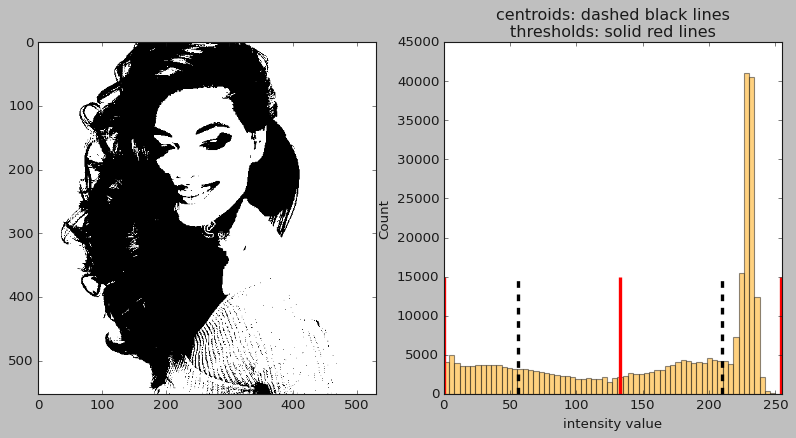

Iterações finalizadas 
Tempo médio de iteração:  1.8669986128807068
Iterações finalizadas 
Tempo médio de iteração:  1.8730008900165558
Iterações finalizadas 
Tempo médio de iteração:  1.845951408147812
Iterações finalizadas 
Tempo médio de iteração:  1.8430364429950714
Iterações finalizadas 
Tempo médio de iteração:  1.8550033271312714
Iterações finalizadas 
Tempo médio de iteração:  1.9469974339008331
Iterações finalizadas 
Tempo médio de iteração:  1.975046843290329
Iterações finalizadas 
Tempo médio de iteração:  1.8489996790885925
Iterações finalizadas 
Tempo médio de iteração:  1.8510004878044128
Iterações finalizadas 
Tempo médio de iteração:  1.846984624862671
Tamanho da imagem: 293643 Numero de Klosters 3 
Tempo de medio de iteração 1.8753019750118256 (Desvio padrao da iteração 0.044229310639184026 ) 
Numero de iterações: 8
Teste de estabilidade
Variabilidade na iteração: 0.023585167204287254
cluster 0 threshold 0 : 90
cluster 1 threshold 91 : 181
cluster 2 threshold 182 : 254

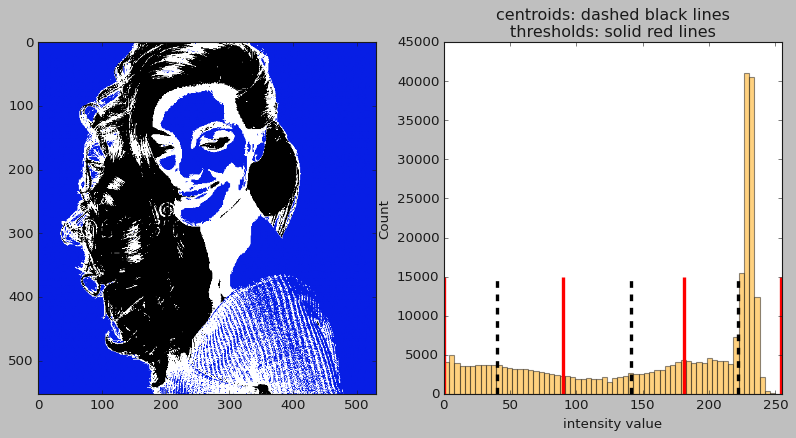

Iterações finalizadas 
Tempo médio de iteração:  2.2759852011998496
Iterações finalizadas 
Tempo médio de iteração:  2.3077312310536704
Iterações finalizadas 
Tempo médio de iteração:  2.2832271655400596
Iterações finalizadas 
Tempo médio de iteração:  2.3898067474365234
Iterações finalizadas 
Tempo médio de iteração:  2.4546829064687095
Iterações finalizadas 
Tempo médio de iteração:  2.3066529432932534
Iterações finalizadas 
Tempo médio de iteração:  2.2840073506037393
Iterações finalizadas 
Tempo médio de iteração:  2.258668899536133
Iterações finalizadas 
Tempo médio de iteração:  2.2679993708928428
Iterações finalizadas 
Tempo médio de iteração:  2.2800052563349404
Tamanho da imagem: 293643 Numero de Klosters 4 
Tempo de medio de iteração 2.310876707235972 (Desvio padrao da iteração 0.05929498520011332 ) 
Numero de iterações: 6
Teste de estabilidade
Variabilidade na iteração: 0.02565908644734048
cluster 0 threshold 0 : 59
cluster 1 threshold 60 : 127
cluster 2 threshold 128 : 195


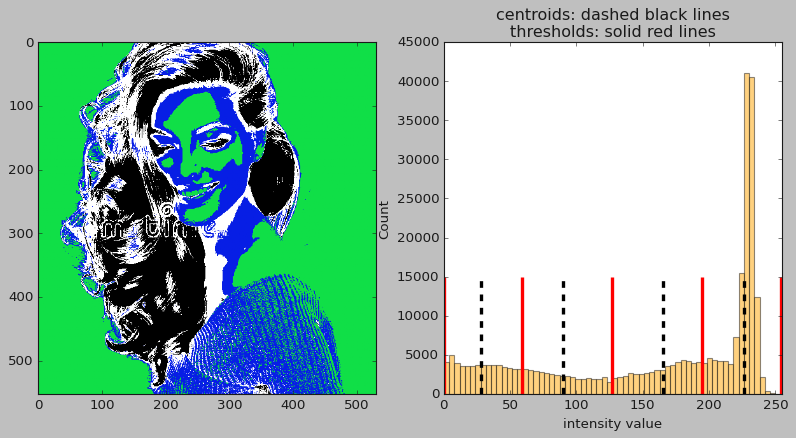

n K inTime (std) iterations(std)
Iterações finalizadas 
Tempo médio de iteração:  3.2690316949571883
Iterações finalizadas 
Tempo médio de iteração:  3.1444544792175293
Iterações finalizadas 
Tempo médio de iteração:  3.027513401848929
Iterações finalizadas 
Tempo médio de iteração:  2.9702963147844588
Iterações finalizadas 
Tempo médio de iteração:  2.9919984000069753
Iterações finalizadas 
Tempo médio de iteração:  2.978285687310355
Iterações finalizadas 
Tempo médio de iteração:  2.968008484159197
Iterações finalizadas 
Tempo médio de iteração:  3.228572028023856
Iterações finalizadas 
Tempo médio de iteração:  2.9680918284824918
Iterações finalizadas 
Tempo médio de iteração:  3.082376275743757
Tamanho da imagem: 607500 Numero de Klosters 2 
Tempo de medio de iteração 3.0628628594534737 (Desvio padrao da iteração 0.10815507521208743 ) 
Numero de iterações: 7
Teste de estabilidade
Variabilidade na iteração: 0.035311759022533
cluster 0 threshold 0 : 136
cluster 1 threshold 137 : 255


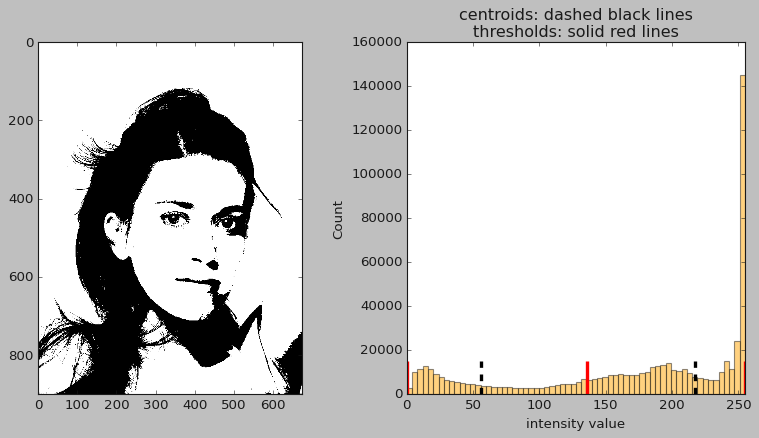

Iterações finalizadas 
Tempo médio de iteração:  3.8986149628957114
Iterações finalizadas 
Tempo médio de iteração:  4.005339807934231
Iterações finalizadas 
Tempo médio de iteração:  3.863104634814792
Iterações finalizadas 
Tempo médio de iteração:  3.841788583331638
Iterações finalizadas 
Tempo médio de iteração:  3.8391447597079806
Iterações finalizadas 
Tempo médio de iteração:  4.00623000992669
Iterações finalizadas 
Tempo médio de iteração:  3.9246174494425454
Iterações finalizadas 
Tempo médio de iteração:  3.910110420650906
Iterações finalizadas 
Tempo médio de iteração:  4.056225935618083
Iterações finalizadas 
Tempo médio de iteração:  4.167758756213718
Tamanho da imagem: 607500 Numero de Klosters 3 
Tempo de medio de iteração 3.95129353205363 (Desvio padrao da iteração 0.1006656224102363 ) 
Numero de iterações: 9
Teste de estabilidade
Variabilidade na iteração: 0.025476624703687032
cluster 0 threshold 0 : 98
cluster 1 threshold 99 : 201
cluster 2 threshold 202 : 255


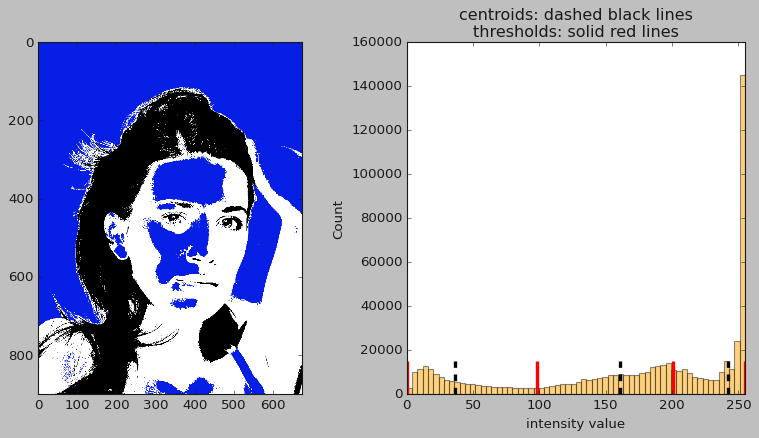

Iterações finalizadas 
Tempo médio de iteração:  4.728541016578674
Iterações finalizadas 
Tempo médio de iteração:  4.838271038872855
Iterações finalizadas 
Tempo médio de iteração:  4.734874469893319
Iterações finalizadas 
Tempo médio de iteração:  4.868153861590794
Iterações finalizadas 
Tempo médio de iteração:  4.86466257912772
Iterações finalizadas 
Tempo médio de iteração:  4.792573315756662
Iterações finalizadas 
Tempo médio de iteração:  4.816242728914533
Iterações finalizadas 
Tempo médio de iteração:  4.778896331787109
Iterações finalizadas 
Tempo médio de iteração:  4.821685331208365
Iterações finalizadas 
Tempo médio de iteração:  4.736706529344831
Tamanho da imagem: 607500 Numero de Klosters 4 
Tempo de medio de iteração 4.798060720307486 (Desvio padrao da iteração 0.049841395488384024 ) 
Numero de iterações: 14
Teste de estabilidade
Variabilidade na iteração: 0.01038782091219344
cluster 0 threshold 0 : 76
cluster 1 threshold 77 : 155
cluster 2 threshold 156 : 217
cluster 

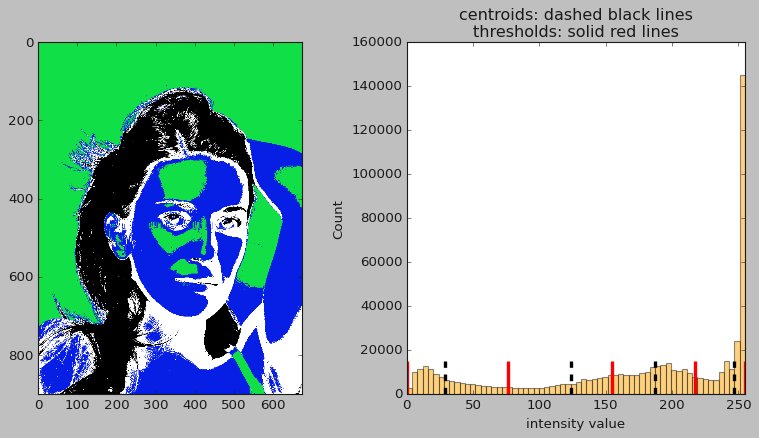

n K inTime (std) iterations(std)
Iterações finalizadas 
Tempo médio de iteração:  1.645945178137885
Iterações finalizadas 
Tempo médio de iteração:  1.717509561114841
Iterações finalizadas 
Tempo médio de iteração:  1.7594426208072238
Iterações finalizadas 
Tempo médio de iteração:  1.6408798959520128
Iterações finalizadas 
Tempo médio de iteração:  1.639102750354343
Iterações finalizadas 
Tempo médio de iteração:  1.632035043504503
Iterações finalizadas 
Tempo médio de iteração:  1.68887193997701
Iterações finalizadas 
Tempo médio de iteração:  1.6328887674543593
Iterações finalizadas 
Tempo médio de iteração:  1.6409541765848796
Iterações finalizadas 
Tempo médio de iteração:  1.694244040383233
Tamanho da imagem: 333658 Numero de Klosters 2 
Tempo de medio de iteração 1.669187397427029 (Desvio padrao da iteração 0.04151861932705258 ) 
Numero de iterações: 9
Teste de estabilidade
Variabilidade na iteração: 0.02487355187982578
cluster 0 threshold 2 : 164
cluster 1 threshold 165 : 255


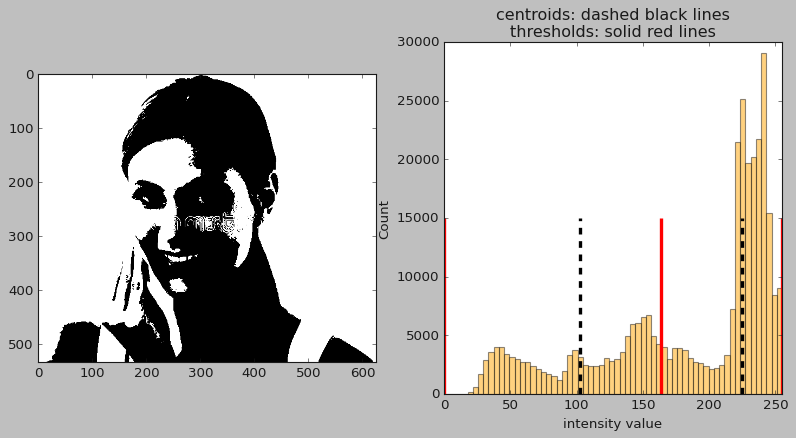

Iterações finalizadas 
Tempo médio de iteração:  2.2300103902816772
Iterações finalizadas 
Tempo médio de iteração:  2.1520625352859497
Iterações finalizadas 
Tempo médio de iteração:  2.1080370247364044
Iterações finalizadas 
Tempo médio de iteração:  2.1240113973617554
Iterações finalizadas 
Tempo médio de iteração:  2.1320526599884033
Iterações finalizadas 
Tempo médio de iteração:  2.111987978219986
Iterações finalizadas 
Tempo médio de iteração:  2.1899884939193726
Iterações finalizadas 
Tempo médio de iteração:  2.211072653532028
Iterações finalizadas 
Tempo médio de iteração:  2.0939283072948456
Iterações finalizadas 
Tempo médio de iteração:  2.1101110875606537
Tamanho da imagem: 333658 Numero de Klosters 3 
Tempo de medio de iteração 2.1463262528181075 (Desvio padrao da iteração 0.04531929027293263 ) 
Numero de iterações: 8
Teste de estabilidade
Variabilidade na iteração: 0.02111481896726036
cluster 0 threshold 2 : 106
cluster 1 threshold 107 : 190
cluster 2 threshold 191 : 25

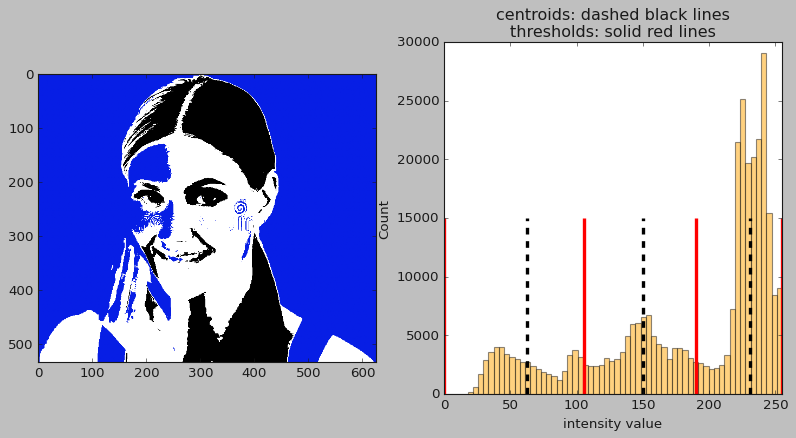

Iterações finalizadas 
Tempo médio de iteração:  2.589014559984207
Iterações finalizadas 
Tempo médio de iteração:  2.587000221014023
Iterações finalizadas 
Tempo médio de iteração:  2.634015679359436
Iterações finalizadas 
Tempo médio de iteração:  2.724997818470001
Iterações finalizadas 
Tempo médio de iteração:  2.6120912432670593
Iterações finalizadas 
Tempo médio de iteração:  2.5639926195144653
Iterações finalizadas 
Tempo médio de iteração:  2.5680140554904938
Iterações finalizadas 
Tempo médio de iteração:  2.560999095439911
Iterações finalizadas 
Tempo médio de iteração:  2.701046347618103
Iterações finalizadas 
Tempo médio de iteração:  2.700019031763077
Tamanho da imagem: 333658 Numero de Klosters 4 
Tempo de medio de iteração 2.6241190671920775 (Desvio padrao da iteração 0.05954407870312057 ) 
Numero de iterações: 8
Teste de estabilidade
Variabilidade na iteração: 0.022691073529234076
cluster 0 threshold 2 : 78
cluster 1 threshold 79 : 134
cluster 2 threshold 135 : 196
clus

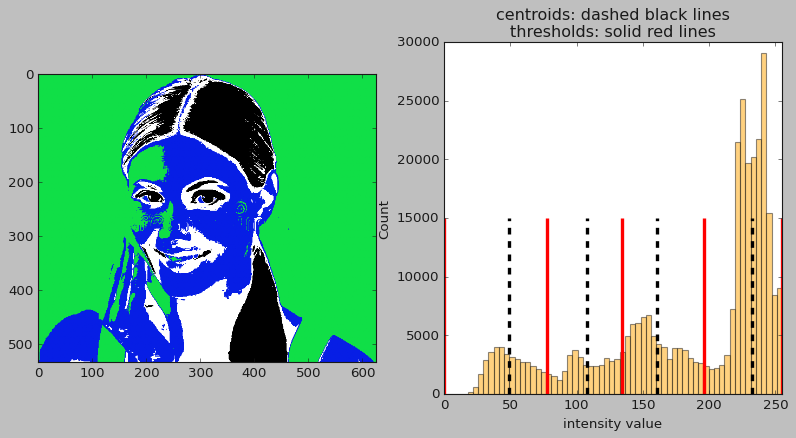

n K inTime (std) iterations(std)
Iterações finalizadas 
Tempo médio de iteração:  2.072000469480242
Iterações finalizadas 
Tempo médio de iteração:  2.0971332618168423
Iterações finalizadas 
Tempo médio de iteração:  2.080010346003941
Iterações finalizadas 
Tempo médio de iteração:  2.0788557529449463
Iterações finalizadas 
Tempo médio de iteração:  2.071993044444493
Iterações finalizadas 
Tempo médio de iteração:  2.0914347171783447
Iterações finalizadas 
Tempo médio de iteração:  2.2274268014090404
Iterações finalizadas 
Tempo médio de iteração:  2.1360000542231967
Iterações finalizadas 
Tempo médio de iteração:  2.0880159650530135
Iterações finalizadas 
Tempo médio de iteração:  2.077712297439575
Tamanho da imagem: 426400 Numero de Klosters 2 
Tempo de medio de iteração 2.102058270999364 (Desvio padrao da iteração 0.04541827669807002 ) 
Numero de iterações: 7
Teste de estabilidade
Variabilidade na iteração: 0.02160657357822778
cluster 0 threshold 0 : 151
cluster 1 threshold 152 : 25

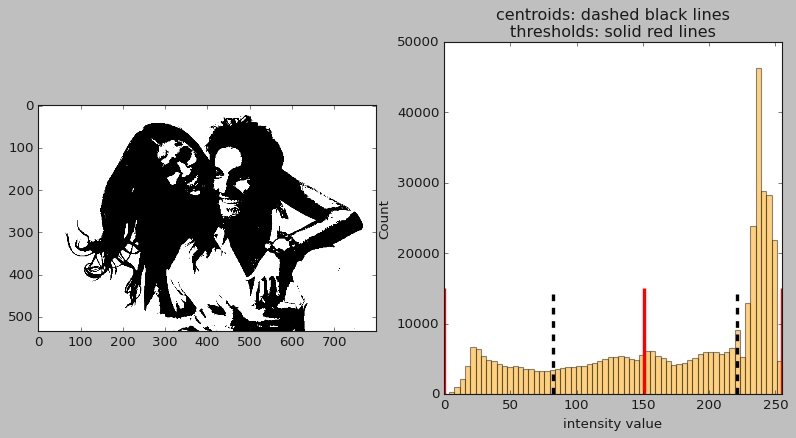

Iterações finalizadas 
Tempo médio de iteração:  2.6978114975823297
Iterações finalizadas 
Tempo médio de iteração:  2.703137901094225
Iterações finalizadas 
Tempo médio de iteração:  2.8204682403140597
Iterações finalizadas 
Tempo médio de iteração:  2.7759996785057917
Iterações finalizadas 
Tempo médio de iteração:  2.696902248594496
Iterações finalizadas 
Tempo médio de iteração:  2.922665966881646
Iterações finalizadas 
Tempo médio de iteração:  2.891591363483005
Iterações finalizadas 
Tempo médio de iteração:  2.912898964352078
Iterações finalizadas 
Tempo médio de iteração:  2.698698732588026
Iterações finalizadas 
Tempo médio de iteração:  2.6987049844529896
Tamanho da imagem: 426400 Numero de Klosters 3 
Tempo de medio de iteração 2.781887957784865 (Desvio padrao da iteração 0.0921266120827303 ) 
Numero de iterações: 9
Teste de estabilidade
Variabilidade na iteração: 0.033116578913583564
cluster 0 threshold 0 : 96
cluster 1 threshold 97 : 186
cluster 2 threshold 187 : 255


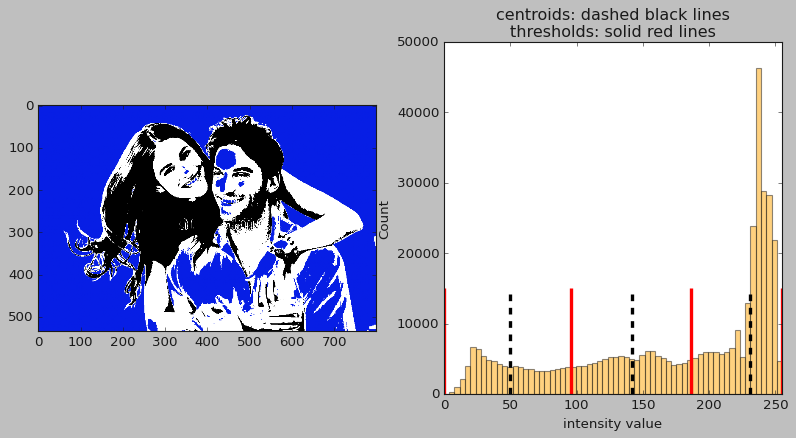

Iterações finalizadas 
Tempo médio de iteração:  3.389326742717198
Iterações finalizadas 
Tempo médio de iteração:  3.449162925992693
Iterações finalizadas 
Tempo médio de iteração:  3.3016757454190935
Iterações finalizadas 
Tempo médio de iteração:  3.4267922128949846
Iterações finalizadas 
Tempo médio de iteração:  3.3497056790760587
Iterações finalizadas 
Tempo médio de iteração:  3.3492593594959805
Iterações finalizadas 
Tempo médio de iteração:  3.4577716248376027
Iterações finalizadas 
Tempo médio de iteração:  3.3074435676847185
Iterações finalizadas 
Tempo médio de iteração:  3.4319831132888794
Iterações finalizadas 
Tempo médio de iteração:  3.3080454894474576
Tamanho da imagem: 426400 Numero de Klosters 4 
Tempo de medio de iteração 3.3771166460854665 (Desvio padrao da iteração 0.058452417590709266 ) 
Numero de iterações: 14
Teste de estabilidade
Variabilidade na iteração: 0.017308379815208188
cluster 0 threshold 0 : 75
cluster 1 threshold 76 : 141
cluster 2 threshold 142 : 2

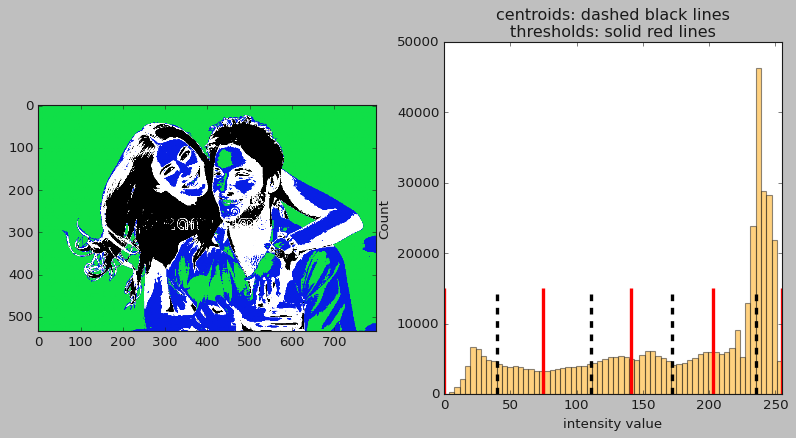

n K inTime (std) iterations(std)
Iterações finalizadas 
Tempo médio de iteração:  2.085590887069702
Iterações finalizadas 
Tempo médio de iteração:  2.1009002923965454
Iterações finalizadas 
Tempo médio de iteração:  2.136800003051758
Iterações finalizadas 
Tempo médio de iteração:  2.190403437614441
Iterações finalizadas 
Tempo médio de iteração:  2.0831617593765257
Iterações finalizadas 
Tempo médio de iteração:  2.0776003122329714
Iterações finalizadas 
Tempo médio de iteração:  2.0744116067886353
Iterações finalizadas 
Tempo médio de iteração:  2.0975993871688843
Iterações finalizadas 
Tempo médio de iteração:  2.2145074605941772
Iterações finalizadas 
Tempo médio de iteração:  2.106375217437744
Tamanho da imagem: 426400 Numero de Klosters 2 
Tempo de medio de iteração 2.1167350363731385 (Desvio padrao da iteração 0.04640392601107853 ) 
Numero de iterações: 10
Teste de estabilidade
Variabilidade na iteração: 0.021922406542950253
cluster 0 threshold 0 : 161
cluster 1 threshold 162 :

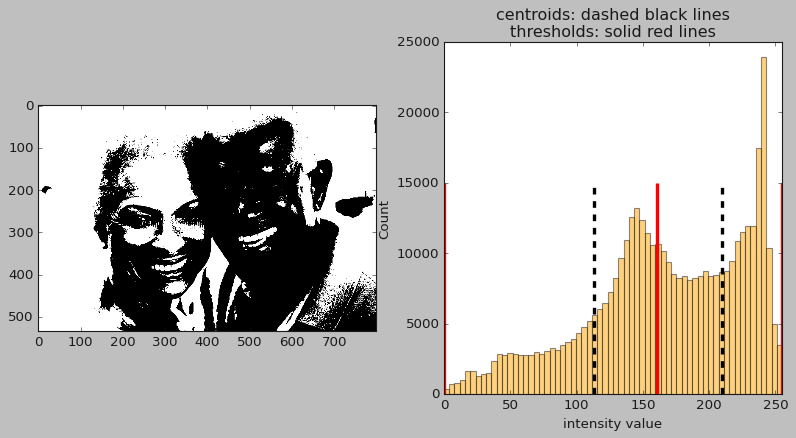

Iterações finalizadas 
Tempo médio de iteração:  2.6754680739508734
Iterações finalizadas 
Tempo médio de iteração:  2.69071266386244
Iterações finalizadas 
Tempo médio de iteração:  2.682676659690009
Iterações finalizadas 
Tempo médio de iteração:  2.840893109639486
Iterações finalizadas 
Tempo médio de iteração:  2.7217920091417103
Iterações finalizadas 
Tempo médio de iteração:  2.6808888647291393
Iterações finalizadas 
Tempo médio de iteração:  2.6906760798560247
Iterações finalizadas 
Tempo médio de iteração:  2.701357947455512
Iterações finalizadas 
Tempo médio de iteração:  2.875564628177219
Iterações finalizadas 
Tempo médio de iteração:  2.7976190778944225
Tamanho da imagem: 426400 Numero de Klosters 3 
Tempo de medio de iteração 2.7357649114396834 (Desvio padrao da iteração 0.07023466186049931 ) 
Numero de iterações: 9
Teste de estabilidade
Variabilidade na iteração: 0.025672769457204075
cluster 0 threshold 0 : 107
cluster 1 threshold 108 : 185
cluster 2 threshold 186 : 255


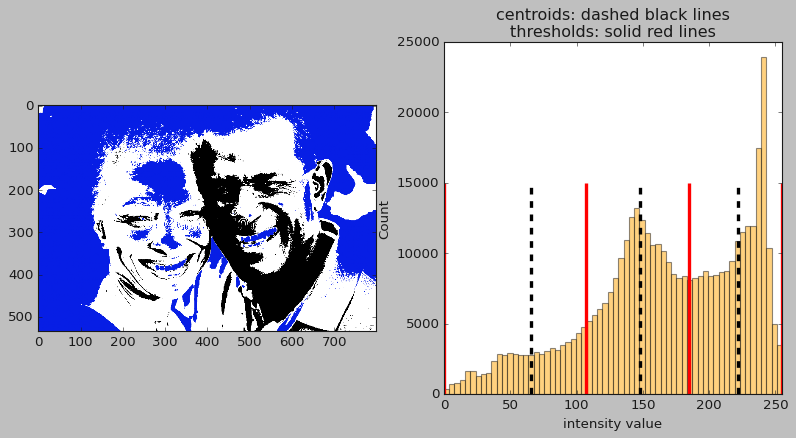

Iterações finalizadas 
Tempo médio de iteração:  3.2934318156469438
Iterações finalizadas 
Tempo médio de iteração:  3.2647924423217773
Iterações finalizadas 
Tempo médio de iteração:  3.251407895769392
Iterações finalizadas 
Tempo médio de iteração:  3.2710613977341425
Iterações finalizadas 
Tempo médio de iteração:  3.3136276404062905
Iterações finalizadas 
Tempo médio de iteração:  3.2519878319331577
Iterações finalizadas 
Tempo médio de iteração:  3.272011336826143
Iterações finalizadas 
Tempo médio de iteração:  3.2540320555369058
Iterações finalizadas 
Tempo médio de iteração:  3.3118069853101457
Iterações finalizadas 
Tempo médio de iteração:  3.2496731962476457
Tamanho da imagem: 426400 Numero de Klosters 4 
Tempo de medio de iteração 3.2733832597732544 (Desvio padrao da iteração 0.0233587884596481 ) 
Numero de iterações: 21
Teste de estabilidade
Variabilidade na iteração: 0.007135977246143231
cluster 0 threshold 0 : 91
cluster 1 threshold 92 : 150
cluster 2 threshold 151 : 200

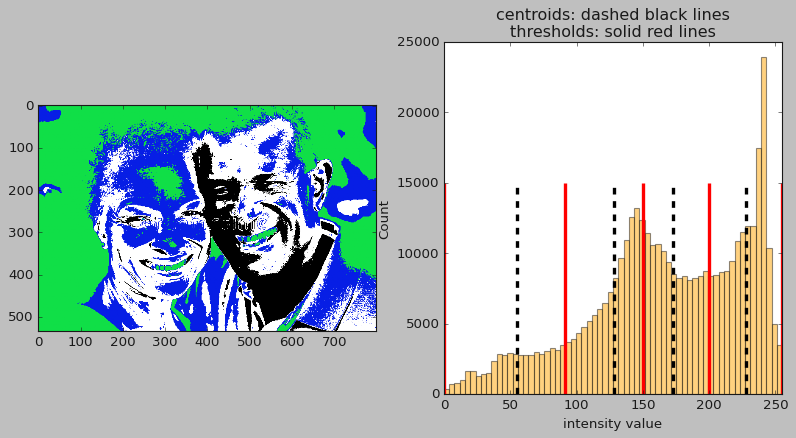

n K inTime (std) iterations(std)
Iterações finalizadas 
Tempo médio de iteração:  2.0614286150251115
Iterações finalizadas 
Tempo médio de iteração:  2.0244030271257674
Iterações finalizadas 
Tempo médio de iteração:  2.0206115586417064
Iterações finalizadas 
Tempo médio de iteração:  2.027582883834839
Iterações finalizadas 
Tempo médio de iteração:  2.0272127900804793
Iterações finalizadas 
Tempo médio de iteração:  2.015409912381853
Iterações finalizadas 
Tempo médio de iteração:  2.0145579746791293
Iterações finalizadas 
Tempo médio de iteração:  2.0676488195146834
Iterações finalizadas 
Tempo médio de iteração:  2.1070738519941057
Iterações finalizadas 
Tempo médio de iteração:  2.010699510574341
Tamanho da imagem: 426400 Numero de Klosters 2 
Tempo de medio de iteração 2.0376628943852015 (Desvio padrao da iteração 0.02952166362493416 ) 
Numero de iterações: 7
Teste de estabilidade
Variabilidade na iteração: 0.014488001772168189
cluster 0 threshold 1 : 149
cluster 1 threshold 150 :

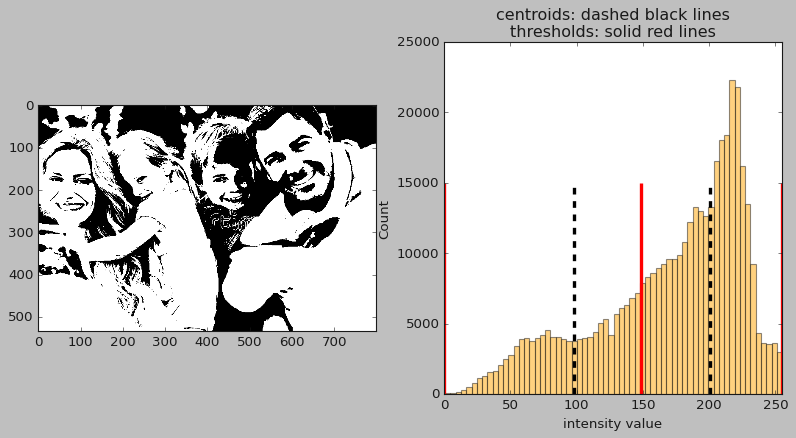

Iterações finalizadas 
Tempo médio de iteração:  2.6053499460220335
Iterações finalizadas 
Tempo médio de iteração:  2.621522641181946
Iterações finalizadas 
Tempo médio de iteração:  2.63284547328949
Iterações finalizadas 
Tempo médio de iteração:  2.706991744041443
Iterações finalizadas 
Tempo médio de iteração:  2.6091648817062376
Iterações finalizadas 
Tempo médio de iteração:  2.6056003093719484
Iterações finalizadas 
Tempo médio de iteração:  2.613626170158386
Iterações finalizadas 
Tempo médio de iteração:  2.6655014991760253
Iterações finalizadas 
Tempo médio de iteração:  2.6891515493392943
Iterações finalizadas 
Tempo médio de iteração:  2.606209635734558
Tamanho da imagem: 426400 Numero de Klosters 3 
Tempo de medio de iteração 2.635596385002136 (Desvio padrao da iteração 0.03595123630296763 ) 
Numero de iterações: 10
Teste de estabilidade
Variabilidade na iteração: 0.013640645626753845
cluster 0 threshold 1 : 112
cluster 1 threshold 113 : 181
cluster 2 threshold 182 : 255


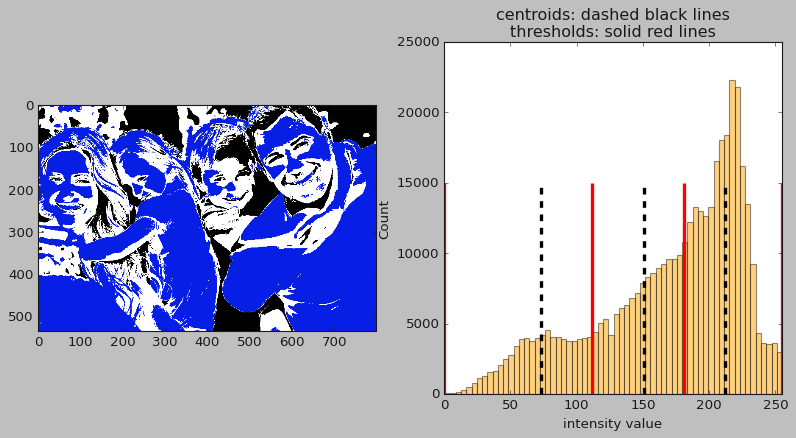

Iterações finalizadas 
Tempo médio de iteração:  3.2185493409633636
Iterações finalizadas 
Tempo médio de iteração:  3.275114566087723
Iterações finalizadas 
Tempo médio de iteração:  3.2176168262958527
Iterações finalizadas 
Tempo médio de iteração:  3.28159898519516
Iterações finalizadas 
Tempo médio de iteração:  3.210594266653061
Iterações finalizadas 
Tempo médio de iteração:  3.2778727263212204
Iterações finalizadas 
Tempo médio de iteração:  3.2423624098300934
Iterações finalizadas 
Tempo médio de iteração:  3.209922894835472
Iterações finalizadas 
Tempo médio de iteração:  3.28644061088562
Iterações finalizadas 
Tempo médio de iteração:  3.2147542536258698
Tamanho da imagem: 426400 Numero de Klosters 4 
Tempo de medio de iteração 3.2434826880693435 (Desvio padrao da iteração 0.031315629060362164 ) 
Numero de iterações: 16
Teste de estabilidade
Variabilidade na iteração: 0.009654939480809295
cluster 0 threshold 1 : 95
cluster 1 threshold 96 : 150
cluster 2 threshold 151 : 196
cl

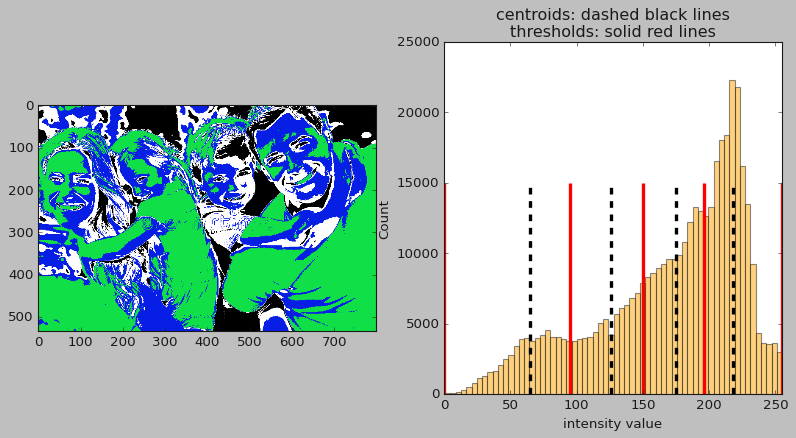

In [7]:
plt.style.use('classic')

RODADAS_BENCHMARK =10
MIN_CLUSTERS = 2
MAX_CLUSTERS = 4

L = 256

for i in range(nImg):
    print('n K inTime (std) iterations(std)')
    x=ResX[i]
    y= ResY[i]
    N=x*y

    for K in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
        #InTime=[] não vai ser util para essa analise
        ItTime=[]
        Iter=[]

        for bench in range(RODADAS_BENCHMARK):
            IterTime, iterations, classe, centros = kmeans(Images[i], K, ncolors[i], N, 100)

            #InTime.append(InitTime)
            ItTime.append(IterTime)
            Iter.append(iterations)

        sizes.append(N)
        times.append(np.mean(ItTime))

        print('Tamanho da imagem:',N, 'Numero de Klosters',K, '\nTempo de medio de iteração',np.mean(ItTime), '(Desvio padrao da iteração', np.std(ItTime), ')', '\nNumero de iterações:',int(np.mean(Iter)))            
        
        print('Teste de estabilidade')
        print('Variabilidade na iteração:',(np.std(ItTime)/np.mean(ItTime)))
        OrderOf = np.argsort(centros)[0]

        up=[]
        dw=[]
            
        for k in range(K):
            clsslst = np.argwhere(np.array(classe)== k)
            clsspxls= Images[i][0][clsslst]
            up.append(np.max(clsspxls))
            dw.append(np.min(clsspxls))
            print('cluster', k, 'threshold', dw[-1],':', up[-1])

        Mask = []
        for j in range(N):
            Mask.append(colors.hex2color(my_color[OrderOf[classe[j]]]))

        fig,ax = plt.subplots(1,2, figsize=(12,5.5))
        ax[0].imshow(np.array(Mask).reshape(x,y,-1))
        ax[1].hist(np.array(Images[i]).ravel(), bins=64, color= 'orange', alpha =0.5)
        ax[1].set_xlim(0,L-1)
                     
        if ncolors[i] > 1 :
            C=[]
            for k in range(K):
                C.append(int(0.2989*centros[0][k]+0.5870*centros[1][k]+0.1140*centros[2][k]))
        else:
            C=centros
        ax[1].vlines(C,0,15000, linestyle='dashed', linewidths=3, colors='black')
        ax[1].vlines([0]+up,0,15000, linestyle='solid', linewidths=3, colors='red')
        ax[1].set_xlabel('intensity value')
        ax[1].set_ylabel('Count')
        ax[1].set_title('centroids: dashed black lines\nthresholds: solid red lines')
        plt.show()

In [8]:
sizes = np.array(sizes).reshape(-1, 1)
times = np.array(times)

In [41]:
def plotRegressao(x, y, titlex, titley):
    # Calcular a regressão linear
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(x, y, label='Pontos')
    plt.plot(x, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    
    # Adicionar legenda para a equação da linha (posição ajustada para a esquerda)
    plt.text(0.05, 0.85, f'{titley} = {slope:.2g}n + {intercept:.2g}', fontsize=12, ha='left', va='top', transform=plt.gca().transAxes)
    
    # Adicionar legendas (posição na lateral inferior)
    plt.xlabel(titlex)
    plt.ylabel(titley)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.02), shadow=True, ncol=2)
    
    # Exibir o gráfico
    plt.show()


Quantidade de cluesters: 2


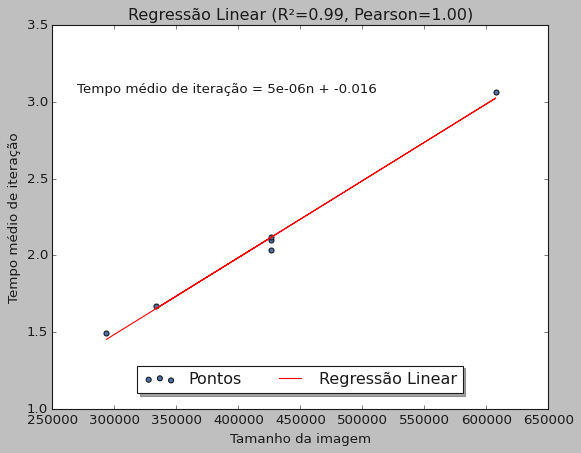

Quantidade de cluesters: 3


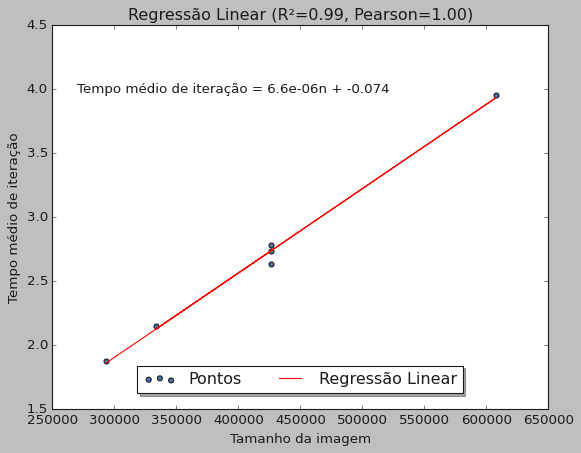

Quantidade de cluesters: 4


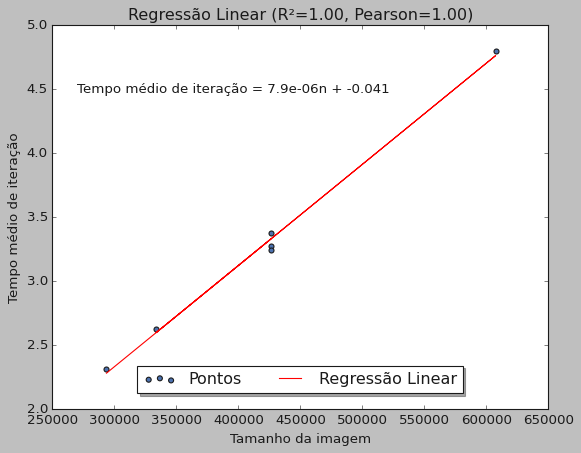

In [43]:
sizes = np.array(sizes).reshape(-1, 1)
times = np.array(times)
for K in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    print('Quantidade de cluesters:', K)
    # Filtrar os dados para o valor específico de K
    sizes_K = sizes[K-MIN_CLUSTERS::MAX_CLUSTERS-MIN_CLUSTERS+1].flatten()
    times_K = times[K-MIN_CLUSTERS::MAX_CLUSTERS-MIN_CLUSTERS+1]
    
    # Plotar a regressão linear
    plotRegressao(sizes_K, times_K, 'Tamanho da imagem', 'Tempo médio de iteração')